# Regresja liniowa

### Przygotowanie środowiska programistycznego

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab as py

#Increase plots font size
params = {'legend.fontsize': 'xx-large',
              'figure.figsize': (10, 7),
              'axes.labelsize': 'xx-large',
              'axes.titlesize':'xx-large',
              'xtick.labelsize':'xx-large',
              'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)

# Zapoznanie się z regresją liniową
* W ramach tego ćwiczenia będziemy chcieli opisać zbiór danych modelem liniowym.
* Zbiór danych stworzymy sami w sposób sztuczny, ale w typowych problemach zebranie i obróbka danych stanowi znaczącą część pracy.
* Nasz liniowy model ma postać: $y = \theta_0 + \theta_1 x$
* Dane wytworzymy dla konkretnych $\theta_0$ i $\theta_1$, a następnie zaimplementujemy regresję liniową, aby znaleźć jak najlepsze oszacowanie dla tych parametrów.
* `(X,Y)` to ciąg uczący. *Co to ciąg uczący?*

## Produkcja danych

Dane wytorzymy według liniowej zależnośći

$$
{\Huge
y = \theta_0 + \theta_1 \cdot x
}
$$

Ustalamy parametry dla symulacji na $\theta_0 = 1$ i $\theta_1 = 3$. Dla wygody włóżmy oba parametry do wektora (np.array):

$$
{\Huge
\vec{\theta} = (\theta_{0}, \theta_{1})
}
$$

In [2]:
theta0 = 1
theta1 = 3
theta = np.array([theta0, theta1])

Użyjemy **nPoints** równoodległych punktów $x$ i dla nich wygenerujmy punkty wg. założonego modelu. 

Dla wygody dane załadujemy do obiektu DataFrame. By to zrobić musimy zmienić wektor wierszowy na kolumnowy o kształcie $(-1,1)$. 

Użyjemy do tego użyciu funkcji ```reshape()``` (ta zamiana także przyda się w dalszej części ćwiczeń).

In [3]:
nPoints = 100
x = np.linspace(0, 10, nPoints)
x = np.reshape(x, (-1,1))

df = pd.DataFrame(data=x, columns = ["x"])
df["y"] = theta[0] + df["x"]*theta[1]

**Proszę:**

* do danych "czystych" dodać kolumnę z danymi z szumem Gaussowskim: $$ y_{noise} = y + Rand(N(0,1)) $$

In [6]:
#BEGIN_SOLUTION
df["y_noise"] = df["y"] + np.random.default_rng().normal(size=nPoints)
#END_SOLUTION
print(df)

           x          y    y_noise
0    0.00000   1.000000  -0.401664
1    0.10101   1.303030   1.684992
2    0.20202   1.606061   2.384215
3    0.30303   1.909091   1.872827
4    0.40404   2.212121   2.491511
..       ...        ...        ...
95   9.59596  29.787879  27.901638
96   9.69697  30.090909  29.787715
97   9.79798  30.393939  29.730195
98   9.89899  30.696970  29.577368
99  10.00000  31.000000  30.861717

[100 rows x 3 columns]


Obejrzyjmy te dane. 

**Proszę narysować:**
* na jednym rysunku: `y vs x` oraz `y_noise vs x`
* na drugim rysunku: histogram `y - y_noise`   

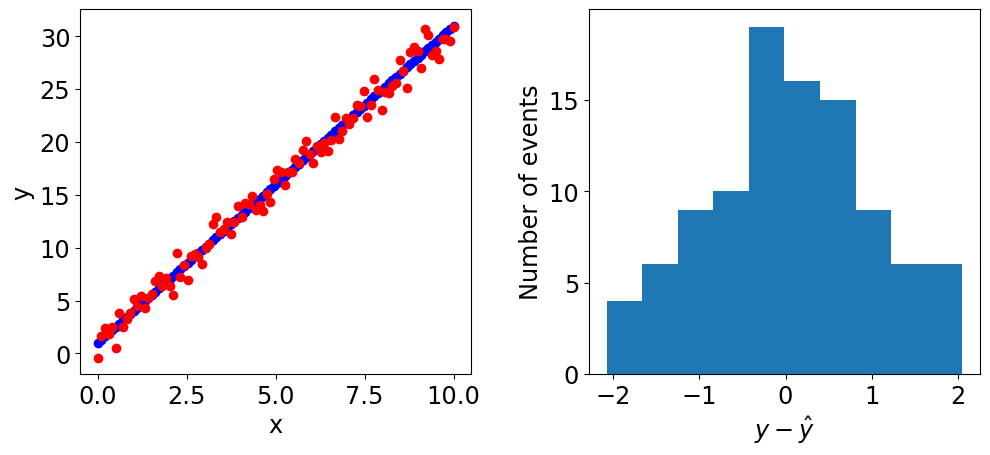

In [9]:
fig, axes = plt.subplots(1,2, figsize=(10,5))

#BEGIN_SOLUTION
axes[0].plot(df["x"], df["y"], 'bo', df["x"], df["y_noise"], 'ro');
axes[1].hist(df["y"] - df["y_noise"]);
#END_SOLUTION

axes[0].set_xlabel("x")
axes[0].set_ylabel("y")
axes[1].set_xlabel(r'$y - \hat{y}$')
axes[1].set_ylabel("Number of events");
plt.subplots_adjust(bottom=0.15, left=0.05, right=0.95, wspace=0.3)

## Algorytm równań normalnych
**Proszę** napisać funkcję ```normal_equations(x,y)``` która:
* na wejściu przyjmuje macierze $x,y$
* implementuje wzór na parametry optymalne na podstawie [równań normalnych](http://brain.fuw.edu.pl/edu/index.php/Uczenie_maszynowe_i_sztuczne_sieci_neuronowe/Wykład_1#Minimalizacja_funkcji_kosztu ). 
* zwraca estymowane parametry $(\theta_{0}^{est}, \theta_{1}^{est})$ w postaci krotki
* funkcja powinna być przetestowana na czystych danych, czyli parze $(x,y)$, a potem na danych zaszumionych $(x ,y_{noise}$)
* dla przypomnienia: odwrotność macierzy można obliczyć w numpy funkcją: `numpy.linalg.inv`
* proszę zwrócić uwagę, że konieczne jest użycie wektorów kolumnowych!

**Wskazówka:** aby skorzystać ze wzorów z wykładu, macierz wejść $X$ musi zawierać nie tylko kolumnę $x$, ale także kolumnę jedynek, aby przemnożona przez wektor [$\theta_0$ $\theta_1$] dawała odpowiedni wektor (kolumnowy) wyjść $y$.

In [13]:
def normal_equations(x,y):
    
    x_expanded = np.column_stack((np.ones(x.shape[0]), x))
    #BEGIN_SOLUTION
    a = np.linalg.inv(np.dot(x_expanded.T, x_expanded))
    b = np.dot(x_expanded.T, y)
    theta = np.dot(a,b)
    #END_SOLUTION
    return theta

theta_est = normal_equations(df["x"], df["y"])
print("Prawdziwe wartości parametrów:", theta.T)
print("Wartości estymowane za pomocą równań normalnych dla nominalnych danych:", theta_est.T)

theta_est = normal_equations(df["x"], df["y_noise"])
print("Wartości estymowane za pomocą równań normalnych dla zaszumionych danych:", theta_est.T)

Prawdziwe wartości parametrów: [1 3]
Wartości estymowane za pomocą równań normalnych dla nominalnych danych: [1. 3.]
Wartości estymowane za pomocą równań normalnych dla zaszumionych danych: [1.11692178 2.97157767]


**Proszę:**

narysować:

* punkty dla danych zaszumionych
* prostą dopasowaną do danych zaszumionych
* prostą dla nominalnych parametrów
* prostą dopasowaną do losowego ułamka próbki, wybranego z użyciem funkcji `pandas.DataFrame.sample()`

Wartości estymowane za pomocą równań normalnych dla zaszumionych danych: [1.11692178 2.97157767]
Wartości estymowane za pomocą równań normalnych dla zaszumionych danych: [2.91243377 2.64598319] 
dla podpróbki obejmującej 5% przypadków.


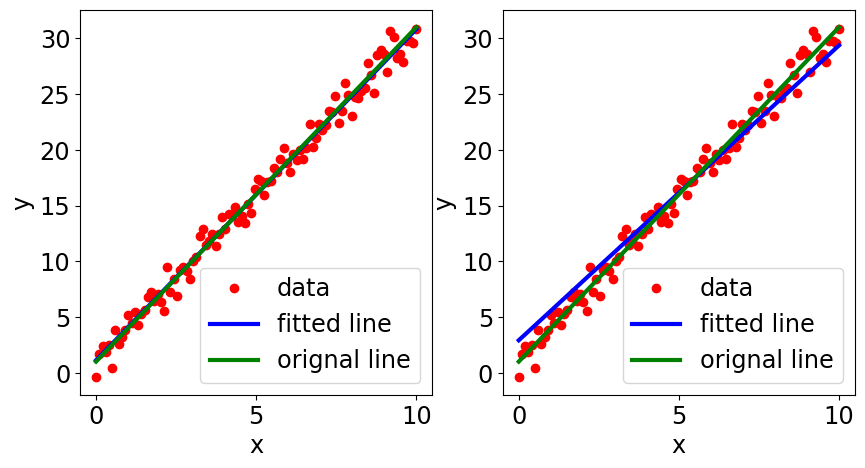

In [15]:
#BEGIN_SOLUTION
theta_est = normal_equations(df["x"], df["y_noise"])
#END_SOLUTION
print("Wartości estymowane za pomocą równań normalnych dla zaszumionych danych:", theta_est.T)

x = df["x"]
x = np.column_stack((np.ones(x.shape[0]), x) )
y_fit = np.sum(theta_est*x, axis=1)
y_original = np.sum(theta*x, axis=1)

fig, axes = plt.subplots(1,2, figsize=(10,5))

# rysunki dla oryginalnych danych
#BEGIN_SOLUTION
axes[0].plot(df["x"], df["y_noise"], 'ro', label = "data");
axes[0].plot(df["x"], y_fit, 'b', linewidth=3.0, label = "fitted line");
axes[0].plot(df["x"], y_original, 'g', linewidth=3.0, label="orignal line");
#END_SOLUTION
axes[0].set_xlabel("x")
axes[0].set_ylabel("y")
axes[0].legend()

df_subsample = df.sample(frac=0.05)
#BEGIN_SOLUTION
theta_est = normal_equations(df_subsample["x"], df_subsample["y_noise"])
print("Wartości estymowane za pomocą równań normalnych dla zaszumionych danych: {} \ndla podpróbki obejmującej 5% przypadków.".format(theta_est.T))

y_fit = np.sum(theta_est*x, axis=1)
y_original = np.sum(theta*x, axis=1)

# rysunki dla zaszumionych danych
axes[1].plot(df["x"], df["y_noise"], 'ro', label = "data");
axes[1].plot(df["x"], y_fit, 'b', linewidth=3.0, label = "fitted line");
axes[1].plot(df["x"], y_original, 'g', linewidth=3.0, label="orignal line");
axes[1].set_xlabel("x")
axes[1].set_ylabel("y")
axes[1].legend();
#END_SOLUTION
pass

## Algorytm gradientowy stochastyczny 

**Proszę** napisać funkcję ```iterative_stochastic_gradient(x,y, theta, alpha, nIter)``` która:
* na wejściu przyjmuje ciąg uczący w postaci wektorów x i y, wartości początkowe $(\theta_{0}, \theta_{1})$, parametr szybkości zbiegania $\alpha$ oraz liczbę iteracji `nIter`
* implementuje wzór na parametry optymalne na podstawie [algorytmu najmniejszych kwadratów](https://kampus-student2.ckc.uw.edu.pl/mod/url/view.php?id=247878). 
* zwraca estymowane parametry $(\theta_{0}^{est}, \theta_{1}^{est})$ dla wszystkich iteracji, czyli tablicę o kształcie
 $(nIter+1, 2)$. Początkową wartość $(\theta_{0}^{est}, \theta_{1}^{est})$ także należy dołączyć, stąd `nIter+1` elementów
* funkcja powinna być przetestowana na czystych danych, czyli parze $(x,y)$ z poczatkową wartością $(\theta_{0}, \theta_{1})$ **równą** nominalnej
* funkcja powinna być przetestowana na czystych danych, czyli parze $(x,y)$ z poczatkową wartością $(\theta_{0}, \theta_{1})$ **różną** od nominalnej

In [16]:
%%time

def iterative_stochastic_gradient(x, y, init_theta, alpha, nIter):
    
    theta = init_theta
    theta_est = np.copy(theta)
    theta_est = np.reshape(theta_est, (-1,2))
    
    indices = np.random.randint(low=0, high=len(x)-1, size=(nIter))
    for iteration in range(nIter):
        #BEGIN_SOLUTION
        x_sample = x[indices[iteration]]
        x_sample = np.column_stack((np.ones(1), x_sample))
        y_sample = y[indices[iteration]]
        theta = theta - 2.0*alpha*(np.dot(theta, x_sample.T) - y_sample)*x_sample
        #END_SOLUTION
        theta_est = np.append(theta_est, theta, axis=0)
    return theta_est   
        
          
theta_est = iterative_stochastic_gradient(df["x"], df["y"], theta, 0.01, 1)    
print("Wartości estymowane z użyciem nominalnej wartości początkowej parametrów theta:",theta_est[-1])

theta_est = iterative_stochastic_gradient(df["x"], df["y"], theta+1, 0.01, 10)    
print("Wartości estymowane z użyciem różnej od nominalnej wartości początkowej parametrów theta:",theta_est[-1])

Wartości estymowane z użyciem nominalnej wartości początkowej parametrów theta: [1. 3.]
Wartości estymowane z użyciem różnej od nominalnej wartości początkowej parametrów theta: [1.75678343 2.85373748]
CPU times: user 1.09 ms, sys: 542 µs, total: 1.63 ms
Wall time: 1.44 ms


**Proszę** narysować następujące rysunki:
* dane, oraz krzywe regresji dla 10 iteracji na jednym rysunku
* wartości parametrów $\theta_{0}$ i $\theta_{1}$ w funkcji numeru iteracji dla $\alpha$ = 0.1, 0.05 oraz 0.01 oraz 10 iteracji
* wartości parametrów $\theta_{0}$ i $\theta_{1}$ w funkcji numeru iteracji dla $\alpha$ = 0.01 dla 100 iteracji

W każdym przypadku jako wartości początkowe proszę przyjąć ($\theta_{0}$, $\theta_{1}$) + 1

Finalna wartość parametrów dla alpha=0.1, nIter = 10: 		 [1018.97254805 6142.3041911 ]
Finalna wartość parametrów dla alpha=0.05, nIter = 10: 		 [-1.31801153  3.87291471]
Finalna wartość parametrów dla alpha=0.001, nIter = 10: 	 [1.82616717 2.85603761]
Finalna wartość parametrów dla alpha=0.001, nIter = 100: 	 [1.35375139 3.12782145]
Oryginalna wartość parametrów: 				 [1 3]


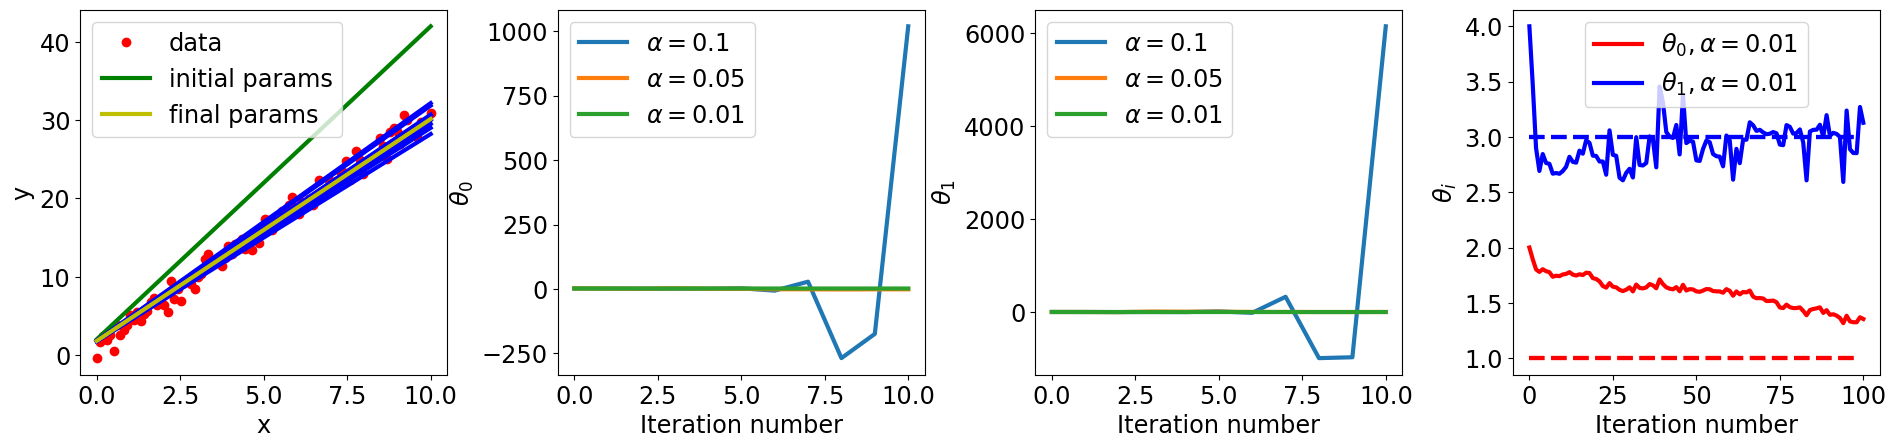

In [17]:
fig, axes = plt.subplots(1,4, figsize=(20,5))

theta_est = iterative_stochastic_gradient(df["x"], df["y_noise"], theta+1, 0.01, 10)  

x = df["x"]
x = np.column_stack((np.ones(x.shape[0]), x) )

axes[0].plot(df["x"], df["y_noise"], 'ro', label = "data");

y_fit = theta_est.dot(x.T)
y_fit = y_fit.T

# rysunki dla y vs x dla danych i prostych dopasowanych w każdej iteracji
#BEGIN_SOLUTION
axes[0].plot(df["x"], y_fit[:,0], 'g', linewidth=3.0, label = "initial params");
axes[0].plot(df["x"], y_fit[:,1:-1], 'b', linewidth=3.0);
axes[0].plot(df["x"], y_fit[:,-1], 'y', linewidth=3.0, label = "final params");
#END_SOLUTION

axes[0].set_xlabel("x")
axes[0].set_ylabel("y")
axes[0].legend();

theta_alpha_01 = iterative_stochastic_gradient(df["x"], df["y_noise"], theta+1, alpha = 0.1, nIter = 10) 
theta_alpha_005 = iterative_stochastic_gradient(df["x"], df["y_noise"], theta+1, alpha = 0.05, nIter = 10) 
theta_alpha_001 = iterative_stochastic_gradient(df["x"], df["y_noise"], theta+1, alpha = 0.01, nIter = 10)
theta_alpha = iterative_stochastic_gradient(df["x"], df["y_noise"], theta+1, alpha = 0.01, nIter = 100)

# rysunki dla theta_0
#BEGIN_SOLUTION
axes[1].plot(theta_alpha_01[:,0], linewidth=3.0, label = r'$\alpha = 0.1$');
axes[1].plot(theta_alpha_005[:,0], linewidth=3.0, label = r'$\alpha = 0.05$');
axes[1].plot(theta_alpha_001[:,0], linewidth=3.0, label = r'$\alpha = 0.01$');
#END_SOLUTION
axes[1].set_xlabel("Iteration number")
axes[1].set_ylabel(r'$\theta_{0}$')
axes[1].legend();

# rysunki dla theta_1
#BEGIN_SOLUTION
axes[2].plot(theta_alpha_01[:,1], linewidth=3.0, label = r'$\alpha = 0.1$');
axes[2].plot(theta_alpha_005[:,1], linewidth=3.0, label = r'$\alpha = 0.05$');
axes[2].plot(theta_alpha_001[:,1], linewidth=3.0, label = r'$\alpha = 0.01$');
#END_SOLUTION
axes[2].set_xlabel("Iteration number")
axes[2].set_ylabel(r'$\theta_{1}$')
axes[2].legend();

# rysunki dla theta_0 i theta_1 w funkcji numeru iteracji dla alpha=0.01
#BEGIN_SOLUTION
axes[3].plot(theta_alpha[:,0], color="red",  linewidth=3.0, label = r'$\theta_{0},  \alpha = 0.01$');
axes[3].plot(theta_alpha[:,1], color="blue", linewidth=3.0, label = r'$\theta_{1}, \alpha = 0.01$');
#END_SOLUTION
axes[3].plot(np.full_like(x,theta[0]),  "--r",linewidth=3.0);
axes[3].plot(np.full_like(x,theta[1]),  "--b",linewidth=3.0);
axes[3].set_xlabel("Iteration number")
axes[3].set_ylabel(r'$\theta_{i}$')
axes[3].legend();

print("Finalna wartość parametrów dla alpha=0.1, nIter = 10: \t\t",theta_alpha_01[-1])
print("Finalna wartość parametrów dla alpha=0.05, nIter = 10: \t\t",theta_alpha_005[-1])
print("Finalna wartość parametrów dla alpha=0.001, nIter = 10: \t",theta_alpha_001[-1])
print("Finalna wartość parametrów dla alpha=0.001, nIter = 100: \t",theta_alpha[-1])
print("Oryginalna wartość parametrów: \t\t\t\t",theta)

plt.subplots_adjust(bottom=0.15, left=0.05, right=0.95, wspace=0.3)

## Algorytm gradientowy zbiorczy

**Proszę** napisać funkcję ```iterative_batch_gradient(x,y, theta, alpha, nIter)``` która:
* na wejściu przyjmuje ciąg uczący w postaci wektorów ```x``` i ```y```, wartości początkowe $(\theta_{0}, \theta_{1})$, 
  parametr szybkości zbiegania $\alpha$ oraz liczbę iteracji ```nIter```
* implementuje wzór na parametry optymalne na podstawie [algorytmu najmniejszych kwadratów](https://kampus-student2.ckc.uw.edu.pl/mod/url/view.php?id=247878). 
* zwraca estymowane parametry $(\theta_{0}^{est}, \theta_{1}^{est})$ dla wszystkich iteracji, czyli tablicę o kształcie
 $(nIter+1, 2)$. Początkową wartość $(\theta_{0}^{est}, \theta_{1}^{est})$ także należy dołączyc, stąd nIter+1 elementów
* funkcja powinna być przetestowana na czystych danych, czyli parze $(x,y)$ z poczatkową wartością $(\theta_{0}, \theta_{1})$ **równą** nominalnej
* funkcja powinna być przetestowana na czystych danych, czyli parze $(x,y)$ z poczatkową wartością $(\theta_{0}, \theta_{1})$ **różną** od nominalnej

In [19]:
%%time

def iterative_batch_gradient(x, y, init_theta, alpha, nIter):
    
    theta = init_theta
    theta_est = np.copy(theta)
    theta_est = np.reshape(theta_est, (-1,2))
    batchSize = len(x)
    for iteration in range(nIter):  
        #BEGIN_SOLUTION 
        x_batch = np.column_stack((np.ones(batchSize), x))
        y_batch = y   
        delta = 2.0*alpha*(np.sum(theta*x_batch, axis=1) - y_batch)
        delta = np.array(delta)
        delta = np.reshape(delta, (batchSize,1))     
        delta = delta*x_batch     
        delta = np.sum(delta, axis=0)/batchSize
        delta = np.reshape(delta, (1,-1)) 
        theta = theta - delta
        #END_SOLUTION
        theta_est = np.append(theta_est, theta, axis=0)
    return theta_est   
        
theta_est = iterative_batch_gradient(df["x"], df["y"], init_theta=theta, alpha=0.01, nIter=1)    
print("Wartości estymowane z użyciem nominalnej wartości początkowej parametrów theta:",theta_est[-1])

theta_est = iterative_batch_gradient(df["x"], df["y"], init_theta=theta+1, alpha=0.01, nIter=500)    
print("Wartości estymowane z użyciem różnej od nominalnej wartości początkowej parametrów theta:",theta_est[-1])

Wartości estymowane z użyciem nominalnej wartości początkowej parametrów theta: [1. 3.]
Wartości estymowane z użyciem różnej od nominalnej wartości początkowej parametrów theta: [1.06901228 2.9896233 ]
CPU times: user 114 ms, sys: 2.51 ms, total: 117 ms
Wall time: 114 ms


**Proszę** narysować następujące rysunki:
* dane oraz krzywe regressji dla 10 iteracji na jednym rysunku
* wartości parametrów $\theta_{0}$ i $\theta_{1}$ w funkcji numeru iteracji dla $\alpha$ = 0.1, 0.05 oraz 0.01 oraz 10 iteracji
* wartości parametrów $\theta_{0}$ i $\theta_{1}$ w funkcji numeru iteracji dla $\alpha$ = 0.01 dla 100 iteracji

W każdym przypadku jako wartości początkowe proszę przyjąć ($\theta_{0}$, $\theta_{1}$) + 1

Finalna wartość parametrów dla alpha=0.1, nIter = 10: 		 [ 8024305.89897227 53367218.86427136]
Finalna wartość parametrów dla alpha=0.05, nIter = 10: 		 [1204.13699019 8000.1253888 ]
Finalna wartość parametrów dla alpha=0.001, nIter = 10: 	 [1.79468226 2.86968062]
Finalna wartość parametrów dla alpha=0.001, nIter = 100: 	 [1.55000099 2.9064598 ]
Oryginalna wartość parametrów: 				 [1 3]


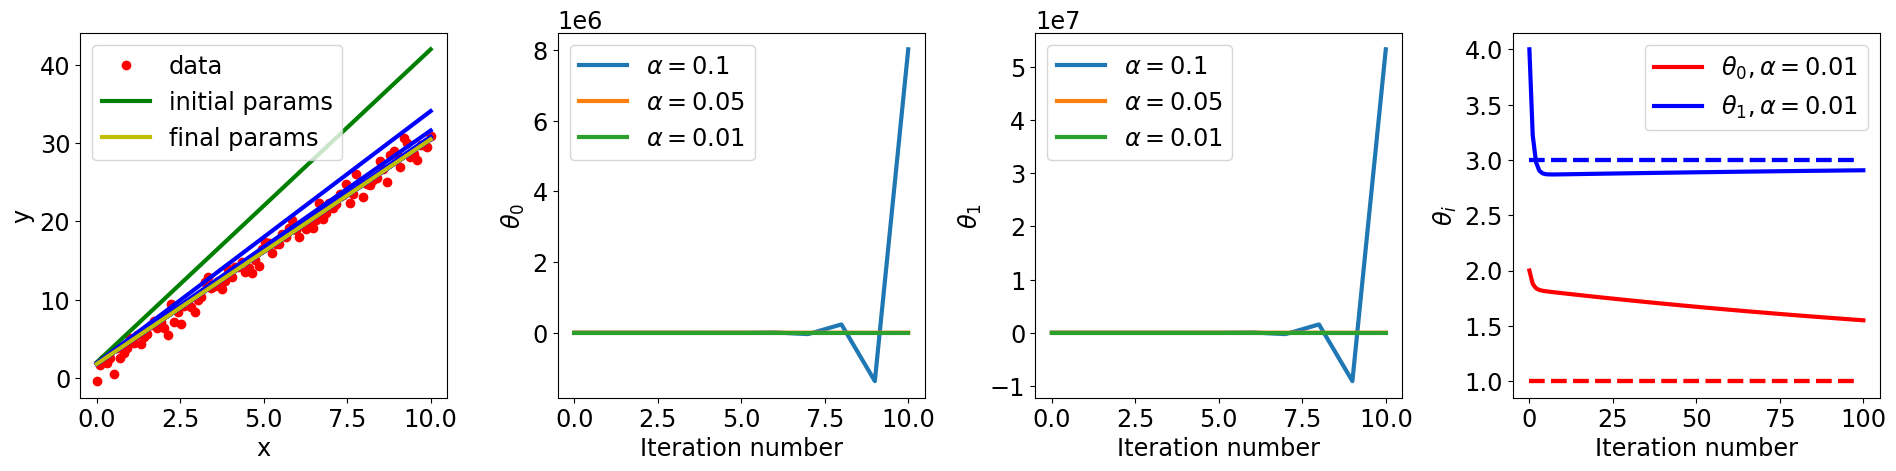

In [20]:
fig, axes = plt.subplots(1,4, figsize=(20,5))

theta_est = iterative_batch_gradient(df["x"], df["y_noise"], theta+1, 0.01, 10)  

x = df["x"]
x = np.column_stack((np.ones(x.shape[0]), x) )

axes[0].plot(df["x"], df["y_noise"], 'ro', label = "data");

y_fit = theta_est.dot(x.T)
y_fit = y_fit.T

#BEGIN_SOLUTION
axes[0].plot(df["x"], y_fit[:,0], 'g', linewidth=3.0, label = "initial params");
axes[0].plot(df["x"], y_fit[:,1:-1], 'b', linewidth=3.0);
axes[0].plot(df["x"], y_fit[:,-1], 'y', linewidth=3.0, label = "final params");
#END_SOLUTION
axes[0].set_xlabel("x")
axes[0].set_ylabel("y")
axes[0].legend();

#BEGIN_SOLUTION
theta_alpha_01 = iterative_batch_gradient(df["x"], df["y_noise"], theta+1, alpha = 0.1, nIter = 10) 
theta_alpha_005 = iterative_batch_gradient(df["x"], df["y_noise"], theta+1, alpha = 0.05, nIter = 10) 
theta_alpha_001 = iterative_batch_gradient(df["x"], df["y_noise"], theta+1, alpha = 0.01, nIter = 10)
theta_alpha = iterative_batch_gradient(df["x"], df["y_noise"], theta+1, alpha = 0.01, nIter = 100)
#END_SOLUTION

#BEGIN_SOLUTION
axes[1].plot(theta_alpha_01[:,0], linewidth=3.0, label = r'$\alpha = 0.1$');
axes[1].plot(theta_alpha_005[:,0], linewidth=3.0, label = r'$\alpha = 0.05$');
axes[1].plot(theta_alpha_001[:,0], linewidth=3.0, label = r'$\alpha = 0.01$');
#END_SOLUTION
axes[1].set_xlabel("Iteration number")
axes[1].set_ylabel(r'$\theta_{0}$')
axes[1].legend();

#BEGIN_SOLUTION
axes[2].plot(theta_alpha_01[:,1], linewidth=3.0, label = r'$\alpha = 0.1$');
axes[2].plot(theta_alpha_005[:,1], linewidth=3.0, label = r'$\alpha = 0.05$');
axes[2].plot(theta_alpha_001[:,1], linewidth=3.0, label = r'$\alpha = 0.01$');
#END_SOLUTION
axes[2].set_xlabel("Iteration number")
axes[2].set_ylabel(r'$\theta_{1}$')
axes[2].legend();

#BEGIN_SOLUTION
axes[3].plot(theta_alpha[:,0], color="red", linewidth=3.0, label = r'$\theta_{0},  \alpha = 0.01$');
axes[3].plot(theta_alpha[:,1], color="blue", linewidth=3.0, label = r'$\theta_{1}, \alpha = 0.01$');
#END_SOLUTION
axes[3].plot(np.full_like(x,theta[0]),  "--r",linewidth=3.0);
axes[3].plot(np.full_like(x,theta[1]),  "--b",linewidth=3.0);
axes[3].set_xlabel("Iteration number")
axes[3].set_ylabel(r'$\theta_{i}$')
axes[3].legend();

print("Finalna wartość parametrów dla alpha=0.1, nIter = 10: \t\t",theta_alpha_01[-1])
print("Finalna wartość parametrów dla alpha=0.05, nIter = 10: \t\t",theta_alpha_005[-1])
print("Finalna wartość parametrów dla alpha=0.001, nIter = 10: \t",theta_alpha_001[-1])
print("Finalna wartość parametrów dla alpha=0.001, nIter = 100: \t",theta_alpha[-1])
print("Oryginalna wartość parametrów: \t\t\t\t",theta)

plt.subplots_adjust(bottom=0.15, left=0.05, right=0.95, wspace=0.3)

## Porównanie algorytmów
**Proszę** sprawdzić czy algorytmy optymalizacyjne działają poprawnie dla danych gdzie szum podlega innym rozkładom prawdopodobieństwa niż normalny:

* dla rozkładu jednorodnego w zakresie [-1,1]
* dla rozkłatu t-Studenta o trzech stopniach swobody

Dla wszystkch trzech rozkładów proszę narysować wartości parametrów $\theta_{0}$ i $\theta_{1}$ w funkcji numeru iteracji dla $\alpha$ = 0.01 i 100 iteracji.

In [21]:
#BEGIN_SOLUTION
df["y_flat_noise"] = df["y"] + -1 + 2*np.random.random(nPoints)
#END_SOLUTION
df["y_tStudent_noise"] = df["y"] + np.random.standard_t(df=3, size=nPoints)
print(df)

           x          y    y_noise  y_flat_noise  y_tStudent_noise
0    0.00000   1.000000  -0.401664      0.727782          0.240266
1    0.10101   1.303030   1.684992      2.168074          1.711995
2    0.20202   1.606061   2.384215      0.845642          0.872725
3    0.30303   1.909091   1.872827      1.431498          3.619248
4    0.40404   2.212121   2.491511      2.008149          0.932737
..       ...        ...        ...           ...               ...
95   9.59596  29.787879  27.901638     29.245319         30.898019
96   9.69697  30.090909  29.787715     29.711189         30.613827
97   9.79798  30.393939  29.730195     30.272940         29.766187
98   9.89899  30.696970  29.577368     30.557270         30.247572
99  10.00000  31.000000  30.861717     30.206031         31.207208

[100 rows x 5 columns]


**Proszę:**
* narysować histogramy różnicy zaszumionej i oryginalnej wartości y dla trzech typów szumu: Gaussa, płaskiego, t-Studenta

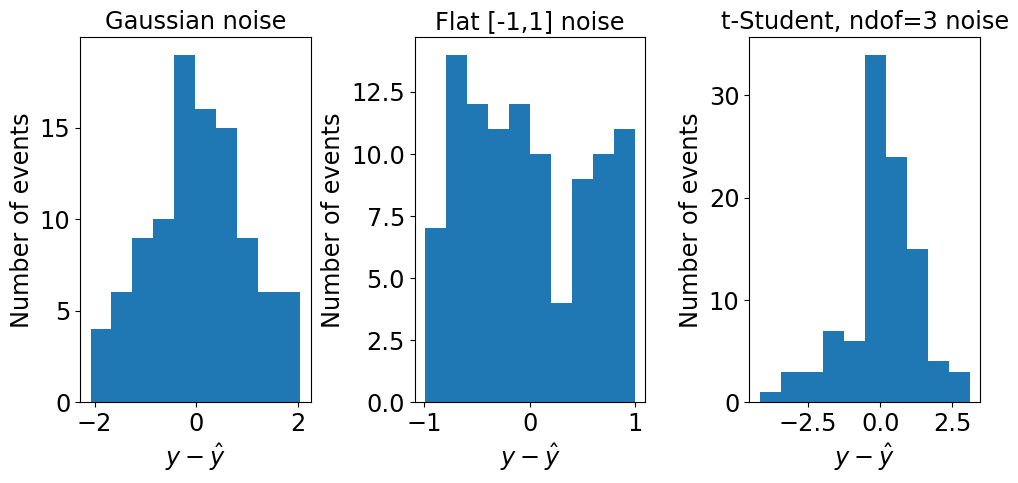

In [25]:
fig, axes = plt.subplots(1,3, figsize=(10,5))

#BEGIN_SOLUTION
axes[0].hist(df["y"] - df["y_noise"]);
axes[1].hist(df["y"] - df["y_flat_noise"]);
axes[2].hist(df["y"] - df["y_tStudent_noise"]);
#END_SOLUTION

axes[0].set_title("Gaussian noise")
axes[0].set_xlabel(r'$y - \hat{y}$')
axes[0].set_ylabel("Number of events");

axes[1].set_title("Flat [-1,1] noise")
axes[1].set_xlabel(r'$y - \hat{y}$')
axes[1].set_ylabel("Number of events");

axes[2].set_title("t-Student, ndof=3 noise")
axes[2].set_xlabel(r'$y - \hat{y}$')
axes[2].set_ylabel("Number of events");

plt.subplots_adjust(bottom=0.15, left=0.05, right=0.95, wspace=0.45)

# Zadanie domowe

**Proszę:**
* narysować wartości parametrów $\theta_{0}$ i $\theta_{1}$ w funkcji numeru iteracji dla $\alpha$ = 0.01 i 200 iteracji dla każdego z rodzajów szumu

Finalna wartość parametrów dla szumu gaussowskiego, nIter = 100: 	 [1.38021974 2.93198814]
Finalna wartość parametrów dla szumu płaskiego, nIter = 100: 		 [1.33118194 2.95300846]
Finalna wartość parametrów dla szumu tStudenta, nIter = 100: 		 [1.13437445 2.98072494]
Oryginalna wartośc parametrów: 					 [1 3]
CPU times: user 164 ms, sys: 0 ns, total: 164 ms
Wall time: 161 ms


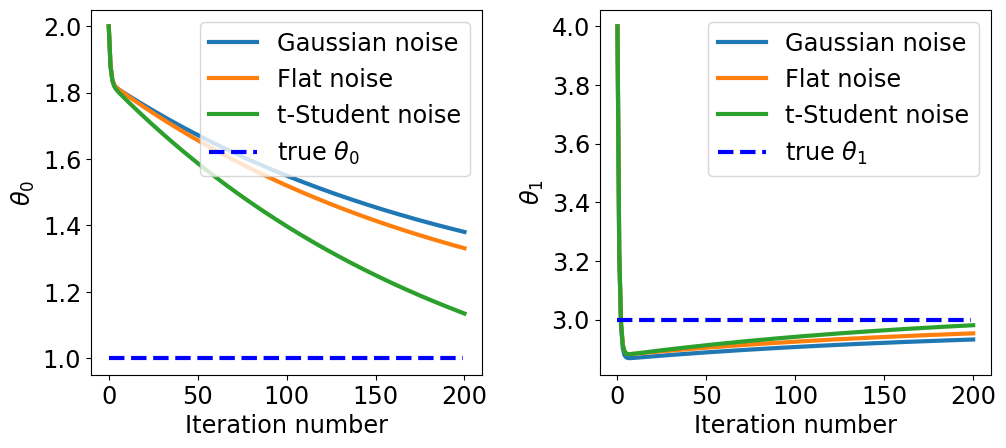

In [26]:
%%time
fig, axes = plt.subplots(1,2, figsize=(10,5))

nIter = 200
#BEGIN_SOLUTION
theta_gaussian_noise = iterative_batch_gradient(df["x"], df["y_noise"], theta+1, 0.01, nIter)  
theta_flat_noise = iterative_batch_gradient(df["x"], df["y_flat_noise"], theta+1, 0.01, nIter)  
theta_tStudent_noise = iterative_batch_gradient(df["x"], df["y_tStudent_noise"], theta+1, 0.01, nIter)  
#END_SOLUTION

x = df["x"]
x = np.column_stack((np.ones(x.shape[0]), x) )

#BEGIN_SOLUTION
axes[0].plot(theta_gaussian_noise[:,0], linewidth=3.0, label = "Gaussian noise");
axes[0].plot(theta_flat_noise[:,0], linewidth=3.0, label = "Flat noise");
axes[0].plot(theta_tStudent_noise[:,0], linewidth=3.0, label = "t-Student noise");
#END_SOLUTION
axes[0].plot(np.full(nIter,theta[0]),  "--b",linewidth=3.0, label=r"true $\theta_{0}$");
axes[0].set_xlabel("Iteration number")
axes[0].set_ylabel(r'$\theta_{0}$')
axes[0].legend();

#BEGIN_SOLUTION
axes[1].plot(theta_gaussian_noise[:,1], linewidth=3.0, label = "Gaussian noise");
axes[1].plot(theta_flat_noise[:,1], linewidth=3.0, label = "Flat noise");
axes[1].plot(theta_tStudent_noise[:,1], linewidth=3.0, label = "t-Student noise");
#END_SOLUTION
axes[1].plot(np.full(nIter,theta[1]), "--b",  linewidth=3.0, label=r"true $\theta_{1}$");
axes[1].set_xlabel("Iteration number")
axes[1].set_ylabel(r'$\theta_{1}$')
axes[1].legend();

print("Finalna wartość parametrów dla szumu gaussowskiego, nIter = 100: \t",theta_gaussian_noise[-1])
print("Finalna wartość parametrów dla szumu płaskiego, nIter = 100: \t\t",theta_flat_noise[-1])
print("Finalna wartość parametrów dla szumu tStudenta, nIter = 100: \t\t",theta_tStudent_noise[-1])
print("Oryginalna wartośc parametrów: \t\t\t\t\t",theta)

plt.subplots_adjust(bottom=0.15, left=0.05, right=0.95, wspace=0.3)